In [25]:
%plot --format svg

In [30]:
setdefaults

# Roots: Open methods
## Newton-Raphson

First-order approximation for the location of the root (i.e. assume the slope at the given point is constant, what is the solution when f(x)=0)

$f'(x_{i})=\frac{f(x_{i})-0}{x_{i}-x_{i+1}}$

$x_{i+1}=x_{i}-\frac{f(x_{i})}{f'(x_{i})}$

Use Newton-Raphson to find solution when $e^{x}=x$

In [1]:
f= @(x) exp(-x)-x;
df= @(x) -exp(-x)-1;

x_i= 0;
c
error_approx = abs((x_r-x_i)/x_r)
x_i=x_r;


error: 'c' undefined near line 1 column 1
error: 'x_r' undefined near line 1 column 21
error: evaluating argument list element number 1
error: 'x_r' undefined near line 1 column 5


In [2]:
x_r = x_i-f(x_i)/df(x_i)
error_approx = abs((x_r-x_i)/x_r)
x_i=x_r;

x_r =  0.50000
error_approx =  1


In [3]:
x_r = x_i-f(x_i)/df(x_i)
error_approx = abs((x_r-x_i)/x_r)
x_i=x_r;

x_r =  0.56631
error_approx =  0.11709


In [4]:
x_r = x_i-f(x_i)/df(x_i)
error_approx = abs((x_r-x_i)/x_r)
x_i=x_r;

x_r =  0.56714
error_approx =  0.0014673


In the bungee jumper example, we created a function f(m) that when f(m)=0, then the mass had been chosen such that at t=4 s, the velocity is 36 m/s. 

$f(m)=\sqrt{\frac{gm}{c_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)-v(t)$.

to use the Newton-Raphson method, we need the derivative $\frac{df}{dm}$

$\frac{df}{dm}=\frac{1}{2}\sqrt{\frac{g}{mc_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)-
\frac{g}{2m}\mathrm{sech}^{2}(\sqrt{\frac{gc_{d}}{m}}t)$

In [6]:
setdefaults
g=9.81; % acceleration due to gravity
m=linspace(50, 200,100); % possible values for mass 50 to 200 kg
c_d=0.25; % drag coefficient
t=4; % at time = 4 seconds
v=36; % speed must be 36 m/s
f_m = @(m) sqrt(g*m/c_d).*tanh(sqrt(g*c_d./m)*t)-v; % anonymous function f_m
df_m = @(m) 1/2*sqrt(g./m/c_d).*tanh(sqrt(g*c_d./m)*t)-g/2./m*sech(sqrt(g*c_d./m)*t).^2;

In [7]:
newtraph(f_m,df_m,140,0.00001)

ans =  142.74


## Secant Methods

Not always able to evaluate the derivative. Approximation of derivative:

$f'(x_{i})=\frac{f(x_{i-1})-f(x_{i})}{x_{i-1}-x_{i}}$

$x_{i+1}=x_{i}-\frac{f(x_{i})}{f'(x_{i})}$

$x_{i+1}=x_{i}-\frac{f(x_{i})}{\frac{f(x_{i-1})-f(x_{i})}{x_{i-1}-x_{i}}}=
    x_{i}-\frac{f(x_{i})(x_{i-1}-x_{i})}{f(x_{i-1})-f(x_{i})}$
    
What values should $x_{i}$ and $x_{i-1}$ take?

To reduce arbitrary selection of variables, use the

## Modified Secant method

Change the x evaluations to a perturbation $\delta$. 

$x_{i+1}=x_{i}-\frac{f(x_{i})(\delta x_{i})}{f(x_{i}+\delta x_{i})-f(x_{i})}$

In [8]:
mod_secant(f_m,1e-6,50,0.00001)

ans =  142.74


Amt_numerical =  563.79
ans = -160.42


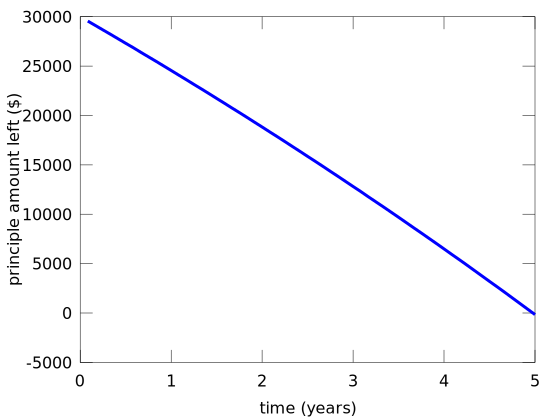

In [32]:
Amt_numerical=mod_secant(@(A) car_payments(A,30000,0.05,5),1e-6,50,0.001)
car_payments(Amt,30000,0.05,5)

In [23]:
Amt*12*5

ans =    3.3968e+04


Amortization calculation makes the same calculation for the monthly payment amount, A, paying off the principle amount, P, over n pay periods with monthly interest rate, r. 

In [27]:
% Amortization calculation
A  = @(P,r,n) P*(r*(1+r)^n)./((1+r)^n-1);
Amt=A(30000,0.05/12,5*12)

Amt =  566.14


## Matlab's function

Matlab and Octave combine bracketing and open methods in the `fzero` function. 

In [33]:
help fzero

'fzero' is a function from the file /usr/share/octave/4.0.0/m/optimization/fzero.m

 -- Function File: fzero (FUN, X0)
 -- Function File: fzero (FUN, X0, OPTIONS)
 -- Function File: [X, FVAL, INFO, OUTPUT] = fzero (...)
     Find a zero of a univariate function.

     FUN is a function handle, inline function, or string containing the
     name of the function to evaluate.

     X0 should be a two-element vector specifying two points which
     bracket a zero.  In other words, there must be a change in sign of
     the function between X0(1) and X0(2).  More mathematically, the
     following must hold

          sign (FUN(X0(1))) * sign (FUN(X0(2))) <= 0

     If X0 is a single scalar then several nearby and distant values are
     probed in an attempt to obtain a valid bracketing.  If this is not
     successful, the function fails.

     OPTIONS is a structure specifying additional options.  Currently,
     'fzero' recognizes these options: "FunValCheck", "OutputFcn",
     "TolX", "

In [40]:
fzero(@(A) car_payments(A,30000,0.05,5,0),500)

ans =  563.79


## Comparison of Solvers

It's helpful to compare to the convergence of different routines to see how quickly you find a solution. 

Comparing the freefall example


    __line__ at line 120 column 16
    line at line 56 column 8
    __plt__>__plt2vv__ at line 500 column 10
    __plt__>__plt2__ at line 246 column 14
    __plt__ at line 133 column 15
    semilogy at line 60 column 10


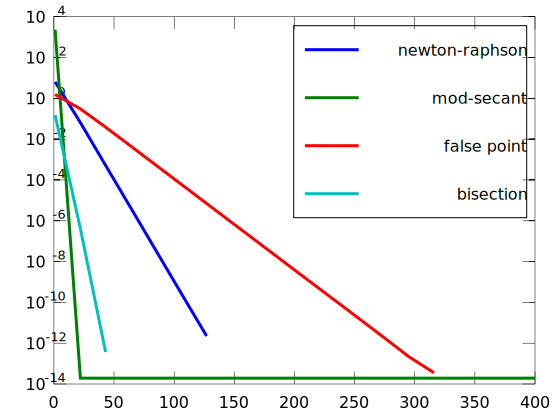

In [84]:
N=20;
iterations = linspace(1,400,N);
ea_nr=zeros(1,N); % appr error Newton-Raphson
ea_ms=zeros(1,N); % appr error Modified Secant
ea_fp=zeros(1,N); % appr error false point method
ea_bs=zeros(1,N); % appr error bisect method
for i=1:length(iterations)
    [root_nr,ea_nr(i),iter_nr]=newtraph(f_m,df_m,200,0,iterations(i));
    [root_ms,ea_ms(i),iter_ms]=mod_secant(f_m,1e-6,300,0,iterations(i));
    [root_fp,ea_fp(i),iter_fp]=falsepos(f_m,1,300,0,iterations(i));
    [root_bs,ea_bs(i),iter_bs]=bisect(f_m,1,300,0,iterations(i));
end
        
semilogy(iterations,abs(ea_nr),iterations,abs(ea_ms),iterations,abs(ea_fp),iterations,abs(ea_bs))
legend('newton-raphson','mod-secant','false point','bisection')

In [75]:
ea_ms

ea_ms =

 Columns 1 through 7:

   43.43883    0.00000    0.00000    0.00000    0.00000    0.00000    0.00000

 Columns 8 through 14:

    0.00000    0.00000    0.00000    0.00000    0.00000    0.00000    0.00000

 Columns 15 through 20:

    0.00000    0.00000    0.00000    0.00000    0.00000    0.00000



    __line__ at line 120 column 16
    line at line 56 column 8
    __plt__>__plt2vv__ at line 500 column 10
    __plt__>__plt2__ at line 246 column 14
    __plt__ at line 133 column 15
    semilogy at line 60 column 10


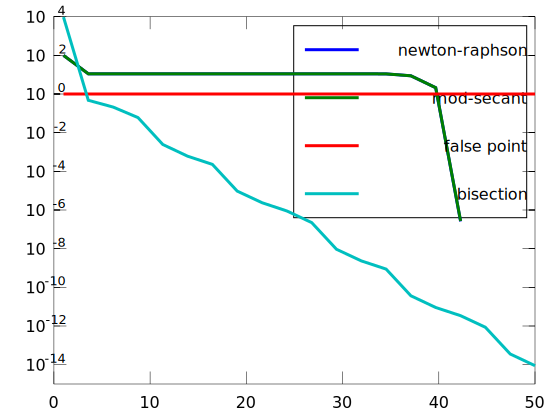

In [101]:
N=20;
f= @(x) x^10-1;
df=@(x) 10*x^9;
iterations = linspace(1,50,N);
ea_nr=zeros(1,N); % appr error Newton-Raphson
ea_ms=zeros(1,N); % appr error Modified Secant
ea_fp=zeros(1,N); % appr error false point method
ea_bs=zeros(1,N); % appr error bisect method
for i=1:length(iterations)
    [root_nr,ea_nr(i),iter_nr]=newtraph(f,df,0.5,0,iterations(i));
    [root_ms,ea_ms(i),iter_ms]=mod_secant(f,1e-6,0.5,0,iterations(i));
    [root_fp,ea_fp(i),iter_fp]=falsepos(f,0,5,0,iterations(i));
    [root_bs,ea_bs(i),iter_bs]=bisect(f,0,5,0,iterations(i));
end
        
semilogy(iterations,abs(ea_nr),iterations,abs(ea_ms),iterations,abs(ea_fp),iterations,abs(ea_bs))
legend('newton-raphson','mod-secant','false point','bisection')

In [102]:
ea_bs
newtraph(f,df,0.5,0,12)

ea_bs =

 Columns 1 through 6:

   9.5357e+03  -4.7554e-01  -2.1114e-01   6.0163e-02  -2.4387e-03   6.1052e-04

 Columns 7 through 12:

   2.2891e-04  -9.5367e-06   2.3842e-06   8.9407e-07  -2.2352e-07   9.3132e-09

 Columns 13 through 18:

  -2.3283e-09  -8.7311e-10   3.6380e-11  -9.0949e-12  -3.4106e-12   8.5265e-13

 Columns 19 and 20:

  -3.5527e-14   8.8818e-15

ans =  16.208


In [93]:
df(300)

ans =    1.9683e+23
